QUESTION 1

STEP 10a: Training ML model on the Training Set

In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv("housing-4.csv")

In [ ]:
## 1. split data to get train and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

## 2. clean the missing values
train_set_clean = train_set.dropna(subset=["total_bedrooms"])
train_set_clean

## 3. derive training features and training labels
train_labels = train_set_clean["median_house_value"].copy() # get labels for output label Y
train_features = train_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set


## 4. scale the numeric features in training set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(train_features) ## call .fit() method to calculate the min and max value for each column in dataset

train_features_normalized = scaler.transform(train_features)
train_features_normalized

array([[0.77988048, 0.1360255 , 0.39215686, ..., 0.10146024, 0.28498602,
        0.13939808],
       [0.14043825, 0.63336876, 0.88235294, ..., 0.02253426, 0.06002302,
        0.14701177],
       [0.18525896, 0.54091392, 0.58823529, ..., 0.04117268, 0.10146358,
        0.32103695],
       ...,
       [0.25498008, 0.50797024, 0.09803922, ..., 0.06045573, 0.09537905,
        0.34714694],
       [0.60956175, 0.15302869, 0.66666667, ..., 0.06045573, 0.08156553,
        0.11765355],
       [0.24601594, 0.50584485, 0.29411765, ..., 0.04683427, 0.11182371,
        0.15009448]])

TASK:

In [ ]:
# Clean the missing values in the test set
test_set_clean = test_set.dropna(subset=["total_bedrooms"])

# Derive test features and test labels
test_labels = test_set_clean["median_house_value"].copy()
test_features = test_set_clean.drop("median_house_value", axis=1)

# Scale the numeric features in test set using the already fitted scaler
test_features_normalized = scaler.transform(test_features)

# Print test features and labels to verify
print("Test Features Normalized:\n", test_features_normalized)
print("Test Labels:\n", test_labels)



Test Features Normalized:
 [[0.51494024 0.17215728 0.21568627 ... 0.01126713 0.01677356 0.32954028]
 [0.20318725 0.53241233 0.50980392 ... 0.05252389 0.13977964 0.23946566]
 [0.65537849 0.12008502 0.21568627 ... 0.05353289 0.16066436 0.27651343]
 ...
 [0.2001992  0.5781084  0.62745098 ... 0.03786541 0.07005427 0.23981738]
 [0.60458167 0.15302869 0.8627451  ... 0.03865019 0.05985858 0.02991683]
 [0.6125498  0.17747078 0.76470588 ... 0.01698478 0.0366716  0.5060344 ]]
Test Labels:
 20303    167400.0
16966    354100.0
10623    160200.0
6146     140800.0
2208     107800.0
           ...   
3263     106300.0
11694    393700.0
1729     131300.0
5087      92300.0
6581     500001.0
Name: median_house_value, Length: 4087, dtype: float64


QUESTION 2

Step 10b: Train the first ML model from the Training Set

In [ ]:
# practice 10b.1: import KNN Regressor from sklearn
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# practice 10b.2: Train a KNN Regressor model
import time
start_time = time.time()

KNN_Regressor = KNeighborsRegressor(n_neighbors=10, metric = 'euclidean')
KNN_Regressor.fit(train_features_normalized, train_labels) # make sure to use normalized features from Step 10a

# Record the ending time
end_time = time.time()
elapsed_time = end_time - start_time
print("Running time:", elapsed_time, "seconds")

Running time: 0.03606057167053223 seconds


QUESTION 3

Step 10c: Make a prediction using a pre-trained ML model on the Training Set

In [ ]:
training_predictions = KNN_Regressor.predict(train_features_normalized )   # make sure to use normalized training features as used in Step 10b
training_predictions

array([117520. , 179180. , 349970.1, ..., 254950. , 150750. , 187270. ])

TASK:

In [ ]:
# Check the sizes of training_predictions and train_labels
print("Shape of training_predictions:", training_predictions.shape)
print("Shape of train_labels:", train_labels.shape)

# Check if they have the same size
if training_predictions.shape == train_labels.shape:
    print("The sizes of training_predictions and train_labels match.")
else:
    print("The sizes of training_predictions and train_labels do not match.")


Shape of training_predictions: (16346,)
Shape of train_labels: (16346,)
The sizes of training_predictions and train_labels match.


QUESTION 4

Step 10d: Analyze the prediction results using Scatter Plot and Correlation

In [ ]:
import pandas as pd
prediction_summary = pd.DataFrame({'predicted_label':training_predictions, 'actual_label':train_labels})
prediction_summary

,predicted_label,actual_label
12346,117520.0,145200.0
19326,179180.0,117000.0
16824,349970.1,263900.0
6869,161640.0,163700.0
16677,167120.0,236100.0
...,...,...
9372,263180.0,310300.0
7291,176630.0,255000.0
17728,254950.0,241900.0
7293,150750.0,150000.0


ANALYSIS 1:

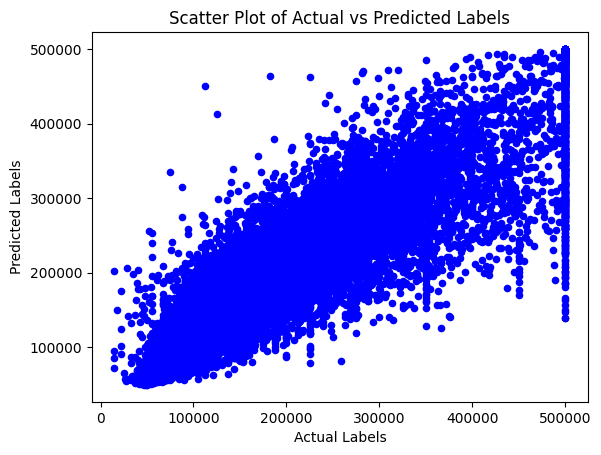

In [ ]:
## plot scatter plot using pandas
import matplotlib.pyplot as plt
prediction_summary.plot.scatter(x='actual_label', y='predicted_label', color='blue', marker='o')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Scatter Plot of Actual vs Predicted Labels')
plt.show()


TASK 2:

In [ ]:
import numpy as np
np.corrcoef(training_predictions, train_labels)

array([[1.        , 0.87566661],
       [0.87566661, 1.        ]])

QUESTION 5

Step 10e: Analyze the prediction results using Mean-squared-error

 Analysis II: Mean-Squre-Error:

In [ ]:
prediction_summary['error'] = prediction_summary['actual_label'] - prediction_summary['predicted_label']
prediction_summary

,predicted_label,actual_label,error
12346,117520.0,145200.0,27680.0
19326,179180.0,117000.0,-62180.0
16824,349970.1,263900.0,-86070.1
6869,161640.0,163700.0,2060.0
16677,167120.0,236100.0,68980.0
...,...,...,...
9372,263180.0,310300.0,47120.0
7291,176630.0,255000.0,78370.0
17728,254950.0,241900.0,-13050.0
7293,150750.0,150000.0,-750.0


In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_labels, training_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

55743.33849539552

QUESTION 6

Step 10f: Better Model Evaluation Strategy: Use the Cross-Validation to evaluate a model configuration (hyper-parameter)


TASK 1:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
train_features_normalized, train_labels = make_regression(n_samples=100, n_features=5, noise=0.1)
KNN_regressor = KNeighborsRegressor(n_neighbors=7, metric='euclidean')
CV_mse_scores = cross_val_score(estimator=KNN_regressor, X=train_features_normalized, y=train_labels, cv=10, scoring='neg_mean_squared_error')
CV_rmse_scores = np.sqrt(-CV_mse_scores)
print("Cross-validation RMSE scores: ", CV_rmse_scores)
print("Mean RMSE: ", np.mean(CV_rmse_scores))
print("Standard Deviation of RMSE: ", np.std(CV_rmse_scores))

Cross-validation RMSE scores:  [101.00731164 109.96166271  62.41737784  88.1223721   45.06730435
  97.94018889  82.18893284  53.68023953  52.21020673  64.38532588]
Mean RMSE:  75.69809225113454
Standard Deviation of RMSE:  21.874234343266743


TASK 2:

In [ ]:
# practice 10f.1: Define one KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor(n_neighbors=7, metric = 'euclidean') # pick one configuration K=7

In [ ]:
## practice 10f.2:  Evaluate the KNN model using cross-validation on the training set
# KNN will take ~3min set using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
CV_mse_scores = cross_val_score(estimator = KNN_regressor, X = train_features_normalized, y = train_labels, cv = 10, scoring = 'neg_mean_squared_error')
print("CV_mse_scores: ", CV_mse_scores)

CV_mse_scores:  [-10202.47700491 -12091.56726689  -3895.92905582  -7765.55246469
  -2031.06192176  -9592.28059897  -6755.02068069  -2881.56811636
  -2725.90568688  -4145.47018868]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
data = pd.read_csv('/content/housing-4.csv')
feature_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income']
label_column = 'median_house_value'
train_features_normalized = data[feature_columns].values
train_labels = data[label_column].values
KNN_regressor = KNeighborsRegressor(n_neighbors=7, metric='euclidean')
CV_mse_scores = cross_val_score(estimator=KNN_regressor, X=train_features_normalized, y=train_labels, cv=10, scoring='neg_mean_squared_error')
CV_rmse_scores = np.sqrt(-CV_mse_scores)
num_cv_scores = len(CV_rmse_scores)
print("Cross-validation RMSE scores: ", CV_rmse_scores)
print("Mean RMSE: ", np.mean(CV_rmse_scores))
print("Standard Deviation of RMSE: ", np.std(CV_rmse_scores))
print("Number of CV scores: ", num_cv_scores)

Cross-validation RMSE scores:  [ 93904.16523797 111040.14782063 122172.92299913  82595.34220079
 128856.30489012 112987.33434013 102311.49646849 115682.86932216
 146103.05826703  94864.01944789]
Mean RMSE:  111051.76609943213
Standard Deviation of RMSE:  17710.76571662754
Number of CV scores:  10


TASK 3:

In [ ]:
def display_scores(scores):
    print("CV_scores: ", scores)
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

display_scores(CV_mse_scores)

CV_scores:  [-8.81799225e+09 -1.23299144e+10 -1.49262231e+10 -6.82199055e+09
 -1.66039473e+10 -1.27661377e+10 -1.04676423e+10 -1.33825263e+10
 -2.13461036e+10 -8.99918219e+09]
CV Mean:  -12646165976.072254
CV Standard deviation:  4047599698.601868


TASK 4:

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the KNN model using 10-fold cross-validation with R2 score
CV_r2_scores = cross_val_score(estimator=KNN_regressor, X=train_features_normalized, y=train_labels, cv=10, scoring='r2')
print("CV_r2_scores: ", CV_r2_scores)

# Display CV scores
def display_scores(scores):
    print("CV_scores: ", scores)
    print("CV Mean: ", scores.mean())
    print("CV Standard deviation: ", scores.std())

display_scores(CV_r2_scores)


CV_r2_scores:  [ 0.06730921 -0.09778966  0.02799955  0.09564901  0.0167354  -0.1053039
 -0.90841031  0.06276362 -0.72022304 -0.11204868]
CV_scores:  [ 0.06730921 -0.09778966  0.02799955  0.09564901  0.0167354  -0.1053039
 -0.90841031  0.06276362 -0.72022304 -0.11204868]
CV Mean:  -0.1673318789320879
CV Standard deviation:  0.3340389429664049


QUESTION 7:

Step 11: Explore different hyper-parameters for KNN-regressor and Practice Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
k_values = [1, 3, 5, 7, 9]
results = []
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_features_normalized, train_labels)
    train_predictions = model.predict(train_features_normalized)
    train_mse = mean_squared_error(train_labels, train_predictions)
    train_correlation = np.corrcoef(train_labels, train_predictions)[0, 1]
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_mse_scores = -cross_val_score(model, train_features_normalized, train_labels, cv=kf, scoring='neg_mean_squared_error')
    cv_r2_scores = cross_val_score(model, train_features_normalized, train_labels, cv=kf, scoring='r2')

    results.append({
        'K': k,
        'Training MSE': train_mse,
        'Training Correlation': train_correlation,
        'Mean of 10-fold CV MSE': np.mean(cv_mse_scores),
        'std of 10-fold CV MSE': np.std(cv_mse_scores),
        'Mean of 10-fold CV R2 scores': np.mean(cv_r2_scores),
        'std of 10-fold CV R2 scores': np.std(cv_r2_scores)
    })
for result in results:
    print(result)

{'K': 1, 'Training MSE': 0.0, 'Training Correlation': 0.9999999999999999, 'Mean of 10-fold CV MSE': 17069624888.794092, 'std of 10-fold CV MSE': 333941957.99678874, 'Mean of 10-fold CV R2 scores': -0.283056374239571, 'std of 10-fold CV R2 scores': 0.03605622007594028}
{'K': 3, 'Training MSE': 5971728515.3999405, 'Training Correlation': 0.7479911519977657, 'Mean of 10-fold CV MSE': 12528598611.261723, 'std of 10-fold CV MSE': 252009574.55879334, 'Mean of 10-fold CV R2 scores': 0.05847582205218375, 'std of 10-fold CV R2 scores': 0.018246472736188204}
{'K': 5, 'Training MSE': 7659926391.64911, 'Training Correlation': 0.6645237560692708, 'Mean of 10-fold CV MSE': 11916861298.939793, 'std of 10-fold CV MSE': 338610792.73617387, 'Mean of 10-fold CV R2 scores': 0.10465268863414492, 'std of 10-fold CV R2 scores': 0.015656250879216512}
{'K': 7, 'Training MSE': 8557005654.462815, 'Training Correlation': 0.6139266297455861, 'Mean of 10-fold CV MSE': 11751202264.174145, 'std of 10-fold CV MSE': 35

QUESTION 8:

Step 12: When will K-NN algorithm suffer Overfitting?

In [ ]:
## Step 1: training the model using KNN algorithm
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor_k1 = KNeighborsRegressor(n_neighbors=1) # pick one configuration K=1
KNN_regressor_k1.fit(train_features_normalized, train_labels)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
### Step 2: make a prediction using KNN model on the training data
training_predictions_knn_k1 = KNN_regressor_k1.predict(train_features_normalized)
training_predictions_knn_k1

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

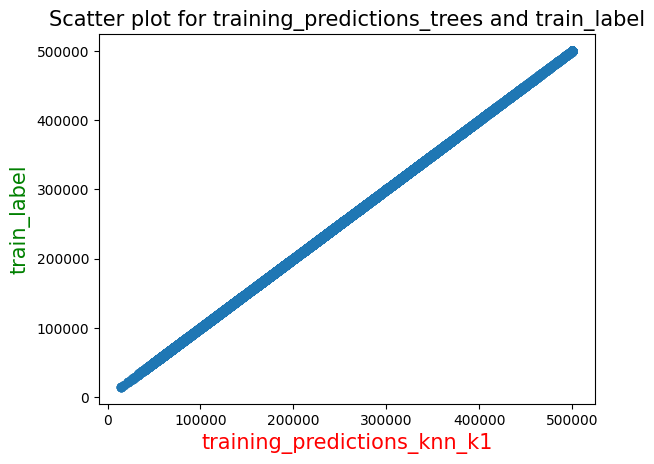

In [ ]:
## Step 3: visualize the scatter plot between predictions and actual labels of training data
import matplotlib.pyplot as plt
plt.scatter(training_predictions_knn_k1, train_labels )
plt.xlabel('training_predictions_knn_k1', fontsize=15, color="red")
plt.ylabel('train_label', fontsize=15,color="green")
plt.title('Scatter plot for training_predictions_trees and train_label', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
knn_k1_mse = mean_squared_error(train_labels, training_predictions_knn_k1)
print("Training MSE of model: ",knn_k1_mse)

Training MSE of model:  0.0


QUESTION 10:

Step 13b: Better Evaluation Using Cross-Validation and Hyper-Parameter tuning (Model finetuning)

In [ ]:
# Practice 13.1: define a ML model to finetune the hyper-parameters
from sklearn.neighbors import KNeighborsRegressor
KNN_regressor = KNeighborsRegressor()
# leave the hyper-parameters empty inside the method classs

In [ ]:
# save parameters in dictionary
param_grid = {
    'param1': [1, 3, 5, 7, 9],
    'param2': ["uniform", "distance"],
}
# param1 and param2 should follow the same names used in sklearn model method
# (for instance, for KNN, we should use 'n_neighbors' and 'weights')

In [ ]:
# parameter 1: n_neighbors
n_neighbors_list = [1, 3, 5, 7, 9]

In [ ]:
# parameter 2: weighting strategies
metrics_list = ["uniform", "distance"]

In [ ]:
# Practice 13.2: Define the hyper-parameter combination
KNN_param_grid = {
'n_neighbors': n_neighbors_list,
'weights': metrics_list
}


In [ ]:
# Practice 13.3: define grid_search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = KNN_regressor, param_grid = KNN_param_grid, cv = 10, scoring = 'r2', return_train_score = True)
## we use 'r2' as evaluation metrics for this example
## check what does return_train_score = True mean

In [ ]:
# Practice 13.4: fit grid-searchcv on training data
grid_search.fit(X = train_features_normalized, y = train_labels)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2')

QUESTION 11

Step 13c: Analyze the Hyper-parameter tunning  results

In [ ]:
# practice 13c.1: get best parameters
grid_search.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
# practice 13c.2: get best estimator
best_knn_model = grid_search.best_estimator_
best_knn_model

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [ ]:
# Create a df from the cv_resutls
df_cv = pd.DataFrame(grid_search.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.017941,0.002024,0.010671,0.003084,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-0.726085,-0.419572,-0.346924,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.018087,0.002854,0.009958,0.001913,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-0.726085,-0.419572,-0.346924,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.017182,0.002245,0.010354,0.001755,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",-0.067072,-0.142100,-0.042851,...,0.552076,0.54471,0.542849,0.554916,0.553059,0.548187,0.550753,0.546929,0.547997,0.004469
3,0.016010,0.000409,0.011084,0.001735,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",-0.079982,-0.117285,-0.035241,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.016383,0.001205,0.010656,0.000611,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.033776,-0.096933,0.021062,...,0.421374,0.41459,0.413165,0.430773,0.429047,0.417078,0.421581,0.417722,0.418977,0.006442


QUESTION 12:

Step 14: Evaluate the best model from Hyper-Parameter tuning step on the Test Set

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
dataset = pd.read_csv('/content/housing-4.csv')
dataset_clean = dataset.dropna(subset=["total_bedrooms"])
X = dataset_clean.drop("median_house_value", axis=1)
y = dataset_clean["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [1, 3, 5],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_normalized, y_train)
best_knn_model = grid_search.best_estimator_
test_predictions_knn = best_knn_model.predict(X_test_normalized)
test_knn_mse = mean_squared_error(y_test, test_predictions_knn)
test_knn_correlation = np.corrcoef(y_test, test_predictions_knn)[0, 1]
test_knn_R2 = r2_score(y_test, test_predictions_knn)
print("MSE: ", test_knn_mse)
print("Correlation: ", test_knn_correlation)
print("R2-score: ", test_knn_R2)


MSE:  3846046943.010671
Correlation:  0.8483018767241569
R2-score:  0.7187571408975905


QUESTION 13

Step 15: Model persistence by saving model to disk

In [ ]:
# Practice 15.1 Save the scaler to disk file

from joblib import dump, load

dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
ls

best_knn_model.joblib  housing-4.csv  sample_data/  scaler.joblib


In [ ]:
# Practice 15.2 Save the scaler to disk file

from joblib import dump, load

dump(best_knn_model, 'best_knn_model.joblib')

['best_knn_model.joblib']

In [ ]:
ls

In [ ]:
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
import pandas as pd
data = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]})
scaler = StandardScaler()
scaler.fit(data)
dump(scaler, 'scaler.joblib')
scaler_reload = load('scaler.joblib')
print("Scaler Mean: ", scaler_reload.mean_)
print("Scaler Scale: ", scaler_reload.scale_)

Scaler Mean:  [2. 5.]
Scaler Scale:  [0.81649658 0.81649658]


In [ ]:
scaler_reload

StandardScaler()

In [ ]:

# Practice 15.4 Save the KNN model from disk file
from joblib import dump, load

KNN_model_reload = load('best_knn_model.joblib')

KNN_model_reload

KNeighborsRegressor(n_neighbors=9, weights='distance')